### check params of the swot raster data

In [1]:
import os
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt


In [2]:
dir_raster = 'data/dianchi_lake/slc'
path_lake_vec = 'data/dianchi_lake/dianchi_vector.gpkg'


In [3]:
## read vector file of the lake.
lake_gpd = gpd.read_file(path_lake_vec)
lake_gpd


,Name,geometry
0,dianchi,"POLYGON Z ((102.66614 24.83805 0.00000, 102.65..."


In [4]:
## Check original .nc raster file.
paths_file = [os.path.join(dir_raster, file) for file in os.listdir(dir_raster) if 'SLC_' in file and 'masked' not in file]
paths_file = sorted(paths_file)
print(len(paths_file))


1


In [5]:
!h5ls {paths_file[0]}

grdem                    Group
noise                    Group
slc                      Group
tvp                      Group
xfactor                  Group


In [6]:
slc_nc = xr.open_dataset(paths_file[0], group='slc')
slc_nc


<xarray.Dataset>
Dimensions:      (num_lines: 22976, num_pixels: 5016, complex_depth: 2)
Dimensions without coordinates: num_lines, num_pixels, complex_depth
Data variables:
    slc_plus_y   (num_lines, num_pixels, complex_depth) float32 ...
    slc_minus_y  (num_lines, num_pixels, complex_depth) float32 ...
    slc_qual     (num_lines) float32 ...
Attributes:
    description:  Single look complex images for plus_y and minus_y channels

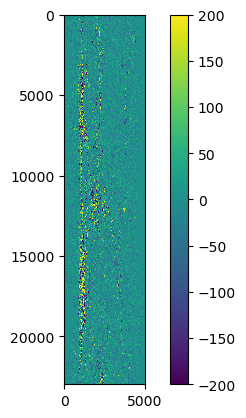

In [7]:
plt.imshow(slc_nc.slc_plus_y[:,:,0], vmax=200, vmin=-200)
plt.colorbar()
